In [1]:
import os 
#data_location = input("Enter Path Location of data")

os.chdir("/home/mitchell/Documents/masters/masters/data")
cwd = os.getcwd()
print(cwd)

/home/mitchell/Documents/masters/masters/data


In [2]:
import numpy as np
import scipy as sp
import astropy as ap
import glob

import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
import sptpol_software as sps
from astropy.io import fits

In [3]:
from sptpol_software.util.tools import stat

In [4]:
from sptpol_software.observation import *
import sptpol_software.observation as obs

pywtl packages could not be imported.  This may break plotting code.


In [5]:
import sptpol_software as sps
import sptpol_software.observation.sky

In [8]:
glob.glob('*.h5')

['ra0hdec-57.5_ra0hdec-57p5_20140706_073929_090ghz.h5',
 'ra0dec-57p5_sum1000_090ghz.h5',
 'ra0dec-57p5_sum5000_150ghz.h5',
 'ra0hdec-57.5_ra0hdec-57p5_20140706_073929_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_150ghz.h5',
 'ra0dec-57p5_sum1000_150ghz.h5',
 'ra0dec-57p5_sum_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_090ghz.h5',
 'first_coadd_test_fbcode.h5',
 'ra0dec-57p5_sum5000_090ghz.h5',
 'ra0dec-57p5_sum_090ghz.h5']

In [6]:
map_150ghz = sps.observation.sky.Map.readFromHDF5("ra0dec-57p5_sum5000_150ghz.h5")
map_90ghz = sps.observation.sky.Map.readFromHDF5("ra0dec-57p5_sum5000_090ghz.h5")

/home/mitchell/Software/SPT/sptpol_software/observation/sky.py:4287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return type(self)(map=self.map[submap_cutout].copy(), **self.initArgs(noshape=True, center=new_center, weight=(self.weight[submap_cutout] if self.weight is not None else None)))
/home/mitchell/Software/SPT/sptpol_software/observation/sky.py:2352: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  polarizations=self.polarizations, **self.initArgs(noshape=True, weight=(self.weight[submap_cutout] if self.weight is not None else None)

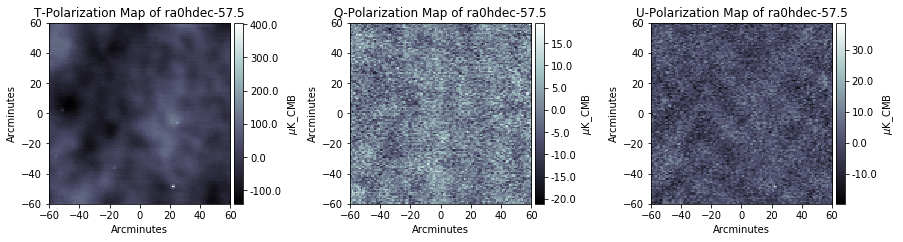

<Figure size 432x288 with 0 Axes>

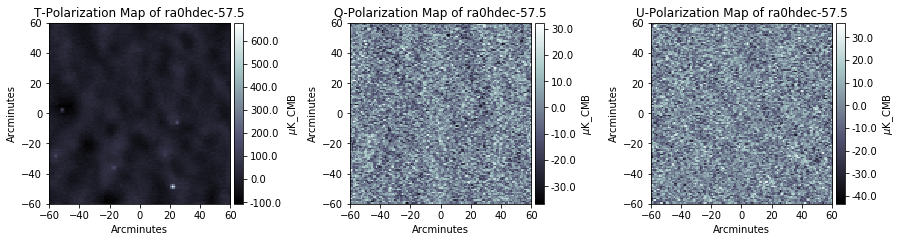

<Figure size 432x288 with 0 Axes>

In [7]:
map_150ghz.getSubmap([2,2], center_offset=[0,0], units='degree').drawImage()
map_90ghz.getSubmap([2,2], center_offset=[0,0], units='degree').drawImage()

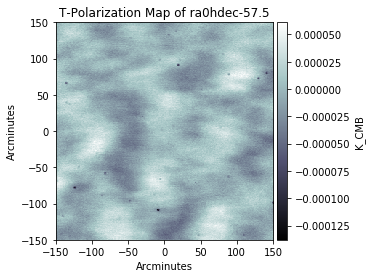

In [10]:
#T_90ghz = map_90ghz.getTOnly()
#T_150ghz = map_150ghz.getTOnly()
diff_T = map_150ghz-map_90ghz
diff_T.getSubmap([5,5], center_offset=[1,1], units='degree').getTOnly().drawImage()

In [10]:
#T_90ghz.drawImage(gaussian_smooth=2, vmin = - 20000, vmax=20000)
#T_150ghz.drawImage(gaussian_smooth=2, vmin = -20000, vmax=20000)
#diff_T.drawImage(gaussian_smooth= 2, vmin = -20000, vmax=20000)

In [11]:
red_mapper_cat = fits.open("DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits")

In [12]:
red_mapper_cat.info()

Filename: DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     20   653691R x 6C   [K, D, D, D, D, D]   


In [13]:
cat_data = red_mapper_cat[1].data

In [14]:
print(cat_data.columns)
print(cat_data.field('ZREDMAGIC'))
print(cat_data.field('ZREDMAGIC_E'))

ColDefs(
    name = 'ID'; format = 'K'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ZREDMAGIC'; format = 'D'
    name = 'ZREDMAGIC_E'; format = 'D'
    name = 'weight'; format = 'D'
)
[0.15000874 0.15001008 0.15001313 ... 0.8999911  0.89999336 0.89999944]
[0.00959975 0.00951272 0.0086528  ... 0.02522893 0.02113392 0.02642067]


In [24]:
df = np.dstack([cat_data.field('RA').ravel(),cat_data.field('DEC').ravel()])
print(df)
points_list = df.transpose()
print(points_list)

[[[ 76.650392 -56.996599]
  [ 10.657494 -44.892612]
  [ 81.917004 -56.612052]
  ...
  [ 43.34189  -43.33625 ]
  [ 14.046157 -43.55935 ]
  [ 51.826101 -56.693781]]]
[[[ 76.650392]
  [ 10.657494]
  [ 81.917004]
  ...
  [ 43.34189 ]
  [ 14.046157]
  [ 51.826101]]

 [[-56.996599]
  [-44.892612]
  [-56.612052]
  ...
  [-43.33625 ]
  [-43.55935 ]
  [-56.693781]]]


In [25]:
def do_kdTree(combined_array, points):
    mytree = sp.spatial.cKDTree(combined_array)
    dist, indexes = mytree.query(points)
    return indexes

In [26]:
results = do_kdTree(df,points_list)

ValueError: Buffer has wrong number of dimensions (expected 2, got 3)

(2, 653691)